<a href="https://colab.research.google.com/github/jmsaavedrar/insightface/blob/main/simple_identification/facerecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importamos módulos básicos
import os
# PIL de pillow es un buen módulo para procesar imágenes
import PIL
import PIL.Image
import numpy as np

In [2]:
# instalamos módulos para procesar rostros
!pip install -U insightface
!pip install onnxruntime
from insightface.app import FaceAnalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 8.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 116.2 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1060437 sha256=c07b5e84fc96438356b62a388865d43c4946bccbf25897ef9219fd63cc99e57d
  Stored in directory: /root/.cache/pip/wheels/27/d8/22/f52d858d16cd06e7b2e6aad34a1777dcfaf000be833bbf8146
Successfully built insightface
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 121.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.9 MB/s eta 0:00:00


In [3]:
# descargar un pequeño dataset de prueba
!wget "https://www.dropbox.com/scl/fi/b9y03enpi01zfb36ckyir/personas.zip?rlkey=19wypqmaps5b5n28bz3gi7xg7&st=s6p3564g&dl=0" -O personas.zip

--2025-07-24 18:22:07--  https://www.dropbox.com/scl/fi/b9y03enpi01zfb36ckyir/personas.zip?rlkey=19wypqmaps5b5n28bz3gi7xg7&st=s6p3564g&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc876642a8842bcfff6e499e7174.dl.dropboxusercontent.com/cd/0/inline/CuHKfcmH-D_fuMdlpMzV29iW4BsupsYykq3QXtGC3RtkQyQ8AbQf2JkossZ7F31HNPAJDVEAsbaw4snXoUHmleUO0GQBzL4g7z9bR7TzlAuLLTS0QRvhKQEV1E4fLhOH7-czDRmYj5qYnRuetHWj1kZF/file# [following]
--2025-07-24 18:22:08--  https://uc876642a8842bcfff6e499e7174.dl.dropboxusercontent.com/cd/0/inline/CuHKfcmH-D_fuMdlpMzV29iW4BsupsYykq3QXtGC3RtkQyQ8AbQf2JkossZ7F31HNPAJDVEAsbaw4snXoUHmleUO0GQBzL4g7z9bR7TzlAuLLTS0QRvhKQEV1E4fLhOH7-czDRmYj5qYnRuetHWj1kZF/file
Resolving uc876642a8842bcfff6e499e7174.dl.dropboxusercontent.com (uc876642a8842bcfff6e499e7174.dl.dropboxusercontent.com)... 162

In [4]:
# descomprimimos el dataset con 7 personalidades
!unzip personas.zip

Archive:  personas.zip
   creating: personas/
   creating: personas/barack/
  inflating: personas/barack/face_2.jpeg  
  inflating: personas/barack/barack.jpeg  
  inflating: personas/barack/barack_2.jpeg  
   creating: personas/dicaprio/
  inflating: personas/dicaprio/dicaprio_2.png  
  inflating: personas/dicaprio/dicaprio.jpg  
   creating: personas/pancho/
  inflating: personas/pancho/pancho.jpeg  
  inflating: personas/pancho/pancho2.jpeg  
   creating: personas/thalia/
  inflating: personas/thalia/thalia2.jpg  
  inflating: personas/thalia/thalia1.jpg  
   creating: personas/paulina/
  inflating: personas/paulina/paulina2.png  
  inflating: personas/paulina/paulina1.jpeg  
  inflating: personas/faces.txt      
   creating: personas/mario/
  inflating: personas/mario/mario1.png  
  inflating: personas/mario/mario2.png  
   creating: personas/michelle/
  inflating: personas/michelle/michelle_obama_2.jpg  
  inflating: personas/michelle/michelle_obama_1.jpeg  


In [6]:
# leemos la lista de personalidades del dataset junto a un número reducido de fotos
datapath = '/content/personas'
ffaces = os.path.join(datapath, 'faces.txt')
fdata = []
dnames = {}
with open(ffaces) as f:
  for line in f :
    ipath, icl = line.split()
    ipath = os.path.join(datapath, ipath)
    fdata.append({'path': ipath, 'name': icl, 'emb': []})
    if icl not in dnames:
        dnames[icl] = len(dnames)
print(dnames)
print(fdata)

{'paulina': 0, 'dicaprio': 1, 'barack': 2, 'pancho': 3, 'thalia': 4, 'mario': 5, 'michelle': 6}
[{'path': '/content/personas/paulina/paulina2.png', 'name': 'paulina', 'emb': []}, {'path': '/content/personas/paulina/paulina1.jpeg', 'name': 'paulina', 'emb': []}, {'path': '/content/personas/dicaprio/dicaprio_2.png', 'name': 'dicaprio', 'emb': []}, {'path': '/content/personas/dicaprio/dicaprio.jpg', 'name': 'dicaprio', 'emb': []}, {'path': '/content/personas/barack/barack.jpeg', 'name': 'barack', 'emb': []}, {'path': '/content/personas/barack/barack_2.jpeg', 'name': 'barack', 'emb': []}, {'path': '/content/personas/barack/face_2.jpeg', 'name': 'barack', 'emb': []}, {'path': '/content/personas/pancho/pancho.jpeg', 'name': 'pancho', 'emb': []}, {'path': '/content/personas/pancho/pancho2.jpeg', 'name': 'pancho', 'emb': []}, {'path': '/content/personas/thalia/thalia1.jpg', 'name': 'thalia', 'emb': []}, {'path': '/content/personas/thalia/thalia2.jpg', 'name': 'thalia', 'emb': []}, {'path': '/c

In [7]:
# inicializamos el modelo de rostros
app = FaceAnalysis(name='buffalo_l', providers=['CUDAExecutionProvider'])  # Use 'CUDAExecutionProvider' for GPU
app.prepare(ctx_id=0)  # ctx_id=-1 for CPU, 0 for GPU

def get_face_embedding(image_path):
    """Extract face embedding from an image"""
    img = PIL.Image.open(image_path)
    if img is None:
        raise ValueError(f"Could not read image: {image_path}")
    img = np.array(img)
    if img.shape[2] == 4 :
      img = img[:,:,:-1]
    faces = app.get(img)
    if len(faces) < 1:
        raise ValueError("No faces detected in the image")
    if len(faces) > 1:
        print("Warning: Multiple faces detected. Using first detected face")
    # retorna el primer rostro junto con su embedding
    return faces[0].embedding

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:04<00:00, 58545.59KB/s]
/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [8]:
# generamos un vector por cada rostro
compute = True
for person in fdata :
    print(person['path'])
    emb = get_face_embedding(person['path'])
    person['emb'] = emb

In [ ]:
# formar una matriz de embeddings
embs = []
idnames = []
n = len(fdata)
dim = len(fdata[0]['emb'])
embs = np.zeros((n, dim), dtype = np.float32)
for i, person in enumerate(fdata) :
  embs[i, :] = person['emb']
  idnames.append(dnames[person['name']])

In [ ]:
print(embs.shape)

(15, 512)


In [ ]:
# similarity search -- simplmente aplicamos producto punto todos contra todos
embs_norm = embs / np.linalg.norm(embs, ord = 2, axis = 1,  keepdims = True)
sim = embs_norm @ np.transpose(embs_norm)
print(sim)


[[ 1.0000000e+00  6.2091148e-01  1.4419974e-01  1.1881724e-01
  -4.3928705e-02 -4.2916708e-02 -4.6245165e-02  1.0602462e-01
   6.0486905e-02 -9.2999907e-03  1.1417773e-01  4.8244365e-02
   1.9483801e-02  1.1305122e-01  1.2899187e-01]
 [ 6.2091148e-01  1.0000000e+00  1.5393433e-01  9.2735447e-02
  -8.4229112e-02 -4.6397049e-02 -1.9339167e-02  1.1954491e-01
   7.1693614e-02  2.9089380e-02  1.3622121e-02  2.8045475e-04
  -1.1759914e-02  3.0222097e-03 -4.5506060e-03]
 [ 1.4419974e-01  1.5393433e-01  1.0000001e+00  8.2802188e-01
   8.7306745e-02  6.2302578e-02  1.0194063e-01  1.7433237e-02
  -4.6713978e-02 -5.9806012e-02 -7.4942425e-02  4.4832777e-02
   1.9818639e-02  1.1826560e-01  1.4005813e-01]
 [ 1.1881724e-01  9.2735447e-02  8.2802188e-01  1.0000000e+00
   1.2986918e-01  3.9691798e-02  1.3073254e-01  1.6856942e-02
  -5.3042419e-02 -8.2204491e-02 -7.5398922e-02  3.7840158e-02
   6.8672374e-04  3.6277410e-02  6.2857181e-02]
 [-4.3928705e-02 -8.4229112e-02  8.7306745e-02  1.2986918e-01
  

In [ ]:
# ordenamos por fila, de mayor a  menor similitud
idx_sort =  np.argsort(-sim, axis = 1)
print(idx_sort)


[[ 0  1  2 14  3 10 13  7  8 11 12  9  5  4  6]
 [ 1  0  2  7  3  8  9 10 13 11 14 12  6  5  4]
 [ 2  3  1  0 14 13  6  4  5 11 12  7  8  9 10]
 [ 3  2  6  4  0  1 14  5 11 13  7 12  8 10  9]
 [ 4  6  5  3  2  7  9 10  8 11 12 13  0 14  1]
 [ 5  6  4  2 14  3 13  9 10 11  7 12  8  0  1]
 [ 6  5  4  3  2 13  9 11 10 12 14  7  1  0  8]
 [ 7  8  1  0  4 13  2  3  9  6  5 11 14 10 12]
 [ 8  7  1  0  4  9 14 10 13 11  5  2  3  6 12]
 [ 9 10 14 13  4  6  5  1  8  7  0 11 12  2  3]
 [10  9  0 14  4  6 13  5  1  8 11 12  7  2  3]
 [11 12  0  2  6  3  4  1  5  7 13 10  8  9 14]
 [12 11  6  2  0  4  3  1  5  9 13 10  7 14  8]
 [13 14  2  0  9  6 10  3  5  7  1 11  8  4 12]
 [14 13  2  9  0 10  3  5  6  1  8  4  7 11 12]]


In [ ]:
# mostramos los nombres de los más similares para cada imagen
for  idx, row in enumerate(idx_sort) :
    name_query = fdata[idx]['name']
    print('Query Name = {}'.format(name_query))
    result = [(fdata[i]['name'], sim[idx, i]) for i in row[1:5] ]
    print(result)


Query Name = paulina
[('paulina', np.float32(0.6209115)), ('dicaprio', np.float32(0.14419974)), ('michelle', np.float32(0.12899187)), ('dicaprio', np.float32(0.11881724))]
Query Name = paulina
[('paulina', np.float32(0.6209115)), ('dicaprio', np.float32(0.15393433)), ('pancho', np.float32(0.11954491)), ('dicaprio', np.float32(0.09273545))]
Query Name = dicaprio
[('dicaprio', np.float32(0.8280219)), ('paulina', np.float32(0.15393433)), ('paulina', np.float32(0.14419974)), ('michelle', np.float32(0.14005813))]
Query Name = dicaprio
[('dicaprio', np.float32(0.8280219)), ('barack', np.float32(0.13073254)), ('barack', np.float32(0.12986918)), ('paulina', np.float32(0.11881724))]
Query Name = barack
[('barack', np.float32(0.70025647)), ('barack', np.float32(0.69845605)), ('dicaprio', np.float32(0.12986918)), ('dicaprio', np.float32(0.087306745))]
Query Name = barack
[('barack', np.float32(0.7008226)), ('barack', np.float32(0.69845605)), ('dicaprio', np.float32(0.06230258)), ('michelle', np.f

In [ ]:
# visualizar espacio
import umap.umap_ as umap
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
reducer = umap.UMAP(n_neighbors=2)
embeddings = reducer.fit_transform(embs)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


NameError: name 'matplotlib' is not defined

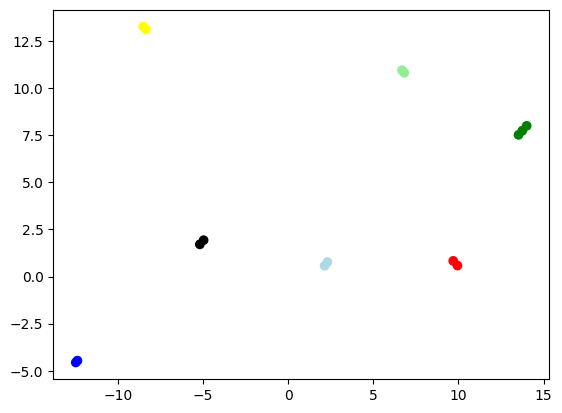

In [ ]:
colors = ['red', 'yellow', 'green', 'black', 'lightblue', 'lightgreen', 'blue']
plt.scatter(embeddings[:, 0], embeddings[:, 1], c = idnames, cmap=matplotlib.colors.ListedColormap(colors))